ET3112 Assignment 1 on Intensity Transformations


D/ENG/21/0034/ET
NT Sandanayake

1.

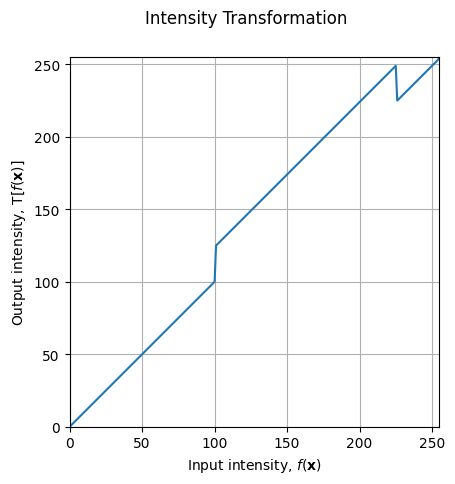

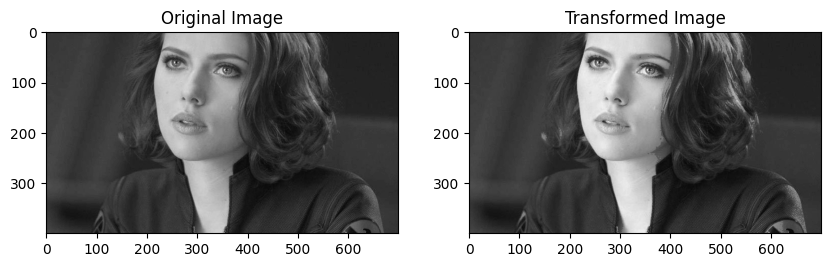

In [3]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im = cv.imread('Images/natasha_grayscale.jpg', cv.IMREAD_GRAYSCALE)
assert im is not None

t1 = np.linspace(0, 100, 101).astype('uint8')    

t2 = np.linspace(125, 249, 125).astype('uint8') 

t3 = np.linspace(225, 255,30).astype('uint8') 


transform = np.concatenate((t1,t2,t3), axis=0).astype('uint8')


fig, ax = plt.subplots()
fig.suptitle("Intensity Transformation")
ax.plot(transform)
ax.set_xlabel(r'Input intensity, $f(\mathbf{x})$')
ax.set_ylabel(r'Output intensity, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
ax.grid()
plt.show()


image_transform = cv.LUT(im, transform)

fig, ax = plt.subplots(1,2, figsize=(10,20))
ax[0].imshow(im, cmap="gray")
ax[0].set_title("Original Image")
ax[1].imshow(image_transform, cmap="gray")
ax[1].set_title("Transformed Image")
plt.show()

2

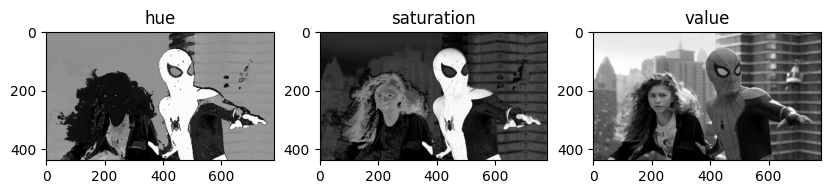

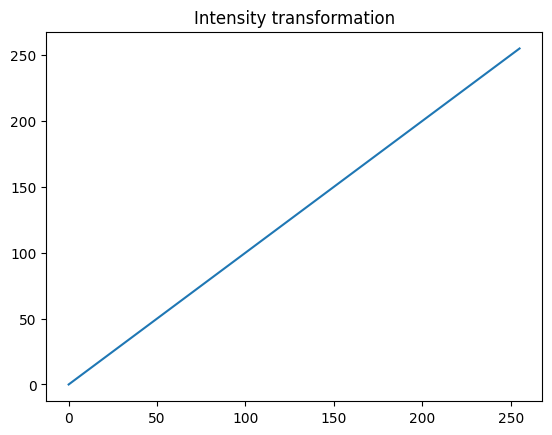

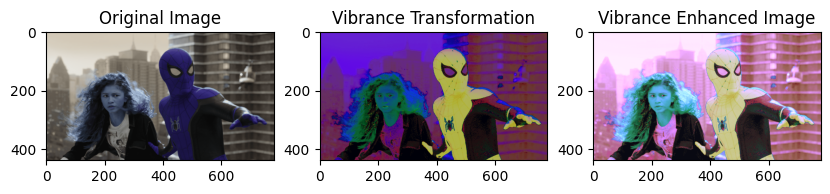

In [3]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im = cv.imread('Images/spider.png', cv.IMREAD_COLOR)
assert im is not None

im1 = cv.cvtColor(im, cv.COLOR_BGR2HSV)
h_img,s_img,v_img = cv.split(im1)

fig, ax= plt.subplots(1,3, figsize=(10,20))
ax[0].imshow(h_img, cmap="gray")
ax[0].set_title('hue')
ax[1].imshow(s_img, cmap="gray")
ax[1].set_title('saturation')
ax[2].imshow(v_img, cmap="gray")
ax[2].set_title('value')
plt.show()

x= np.arange(0, 256).astype('uint8')
a = .1
sigma = 70
Y = np.minimum(((x)+(a*(np.exp(-(x-128)**2/(2*sigma**2))))/128), 255).astype('uint8')
image_transform = cv.LUT(s_img, Y)
plt.title('Intensity transformation')
plt.plot(Y)
plt.show()

newHSV = cv.merge([h_img,image_transform,v_img])
result =  cv.cvtColor(newHSV,  cv.COLOR_HSV2BGR)
added_img = cv.add(newHSV, im)

fig, ax= plt.subplots(1,3, figsize=(10,20))
ax[0].imshow(im, cmap="gray")
ax[0].set_title('Original Image')
ax[1].imshow(newHSV, cmap="gray")
ax[1].set_title('Vibrance Transformation')
ax[2].imshow(added_img, cmap="gray")
ax[2].set_title('Vibrance Enhanced Image')
plt.show()

3. Gamma = 0.8

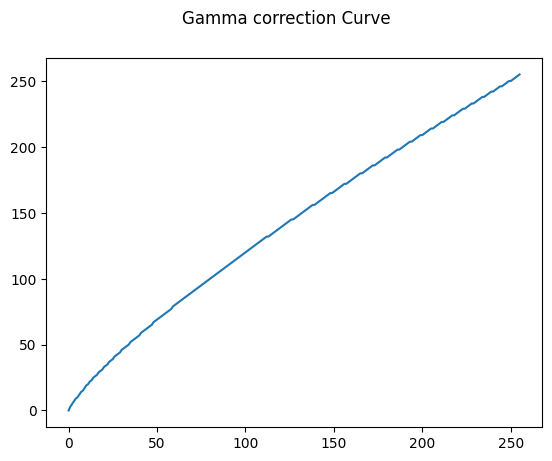

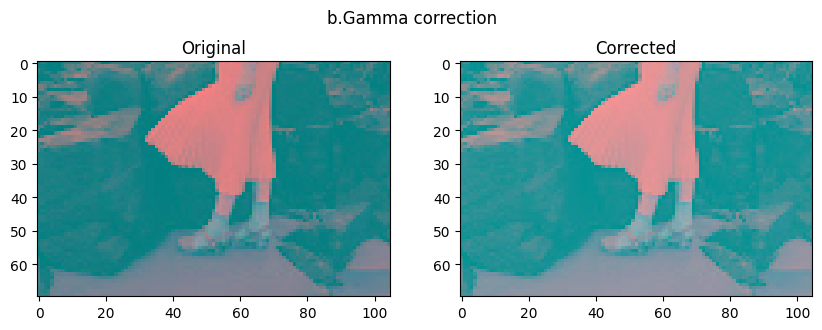

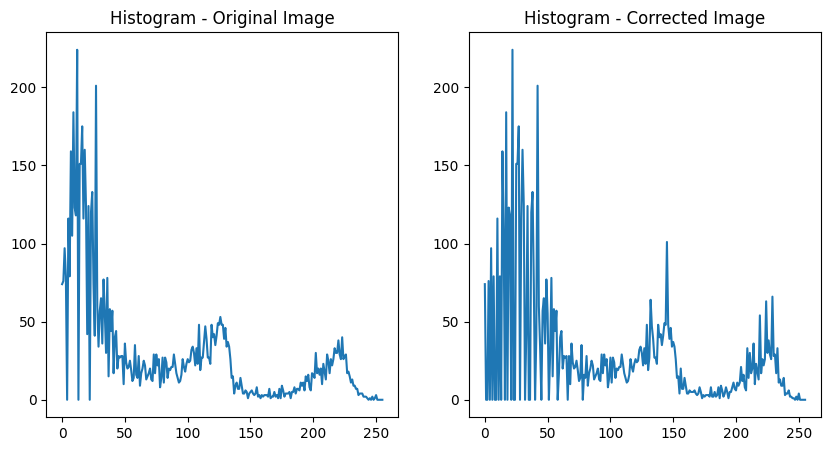

In [9]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im = cv.imread ('images/highlights_and_shadows.jpg', cv.IMREAD_COLOR)
assert im is not None

im_LAB = cv.cvtColor(im, cv.COLOR_BGR2LAB) 

gamma = .8
t = np.array([(i/255.)**gamma*255 for i in range (256)], np.uint8)
g = t[im_LAB]
plt.suptitle("Gamma correction Curve")
plt.plot(t)
plt.show()

fig, ax = plt.subplots(1,2, figsize=(10,3.5))
fig.suptitle("b.Gamma correction")
ax[0].imshow(im_LAB, cmap="gray")
ax[0].set_title("Original")
ax[1].imshow(g,cmap="gray")
ax[1].set_title("Corrected")
plt.show()

plt.figure(figsize = [10, 5])
plt.subplot(1, 2, 1)
plt.gca().set_title('Histogram - Original Image')
im_h = cv.calcHist([im_LAB],[0],None,[256],[0,256])
plt.plot(im_h)

plt.subplot(1, 2, 2)
plt.gca().set_title('Histogram - Corrected Image')
g_h = cv.calcHist([g],[0],None,[256],[0,256])
plt.plot(g_h)
plt.show()

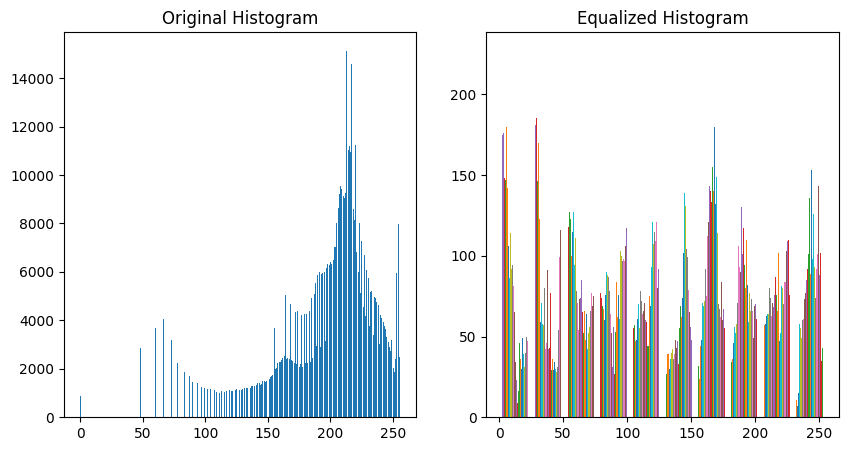

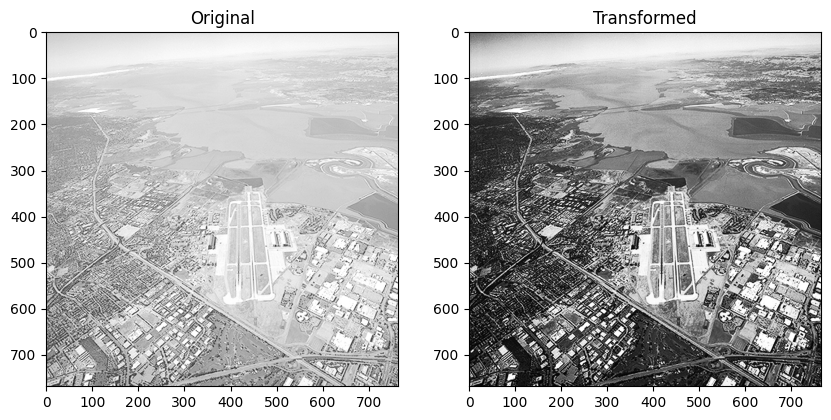

In [10]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

#not changed
im = cv.imread('images/washed_out_aerial_image.png', cv.IMREAD_GRAYSCALE)
assert im is not None

plt.figure(figsize = [10, 5])
plt.subplot(1, 2, 1)
plt.gca().set_title('Original Histogram')
h = np.zeros(256)
h = [np.sum(im==i) for i in range (256)]
plt.bar(range(256), h)

plt.subplot(1, 2, 2)
plt.gca().set_title('Equalized Histogram')
eh = cv.equalizeHist(im)
plt.hist(eh)
plt.show()

fig, ax= plt.subplots(1,2, figsize=(10,20))
ax[0].imshow(im, cmap="gray")
ax[0].set_title('Original')
ax[1].imshow(eh, cmap="gray")
ax[1].set_title('Transformed')
plt.show()

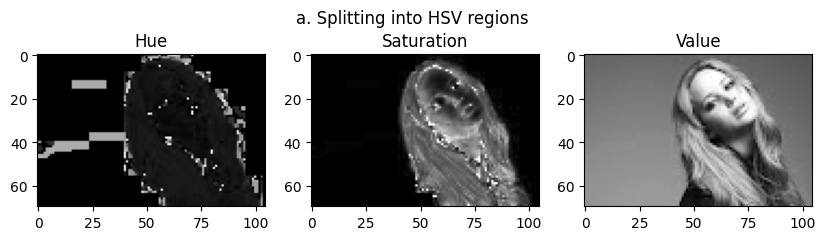

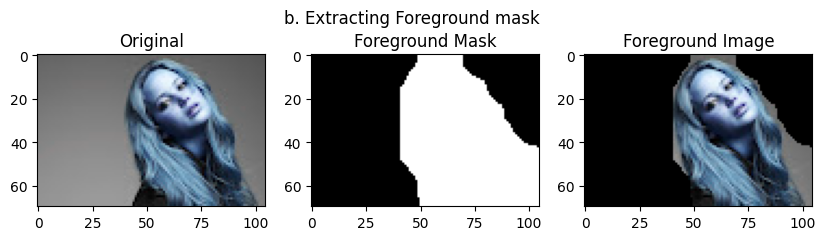

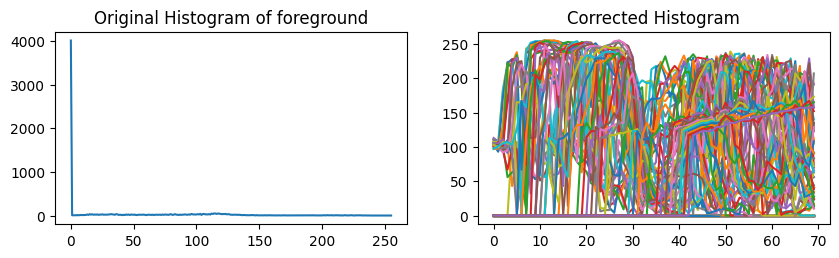

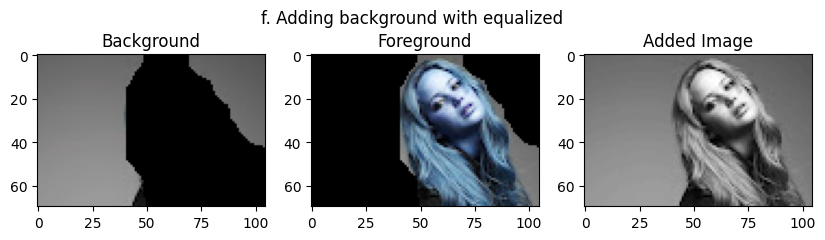

In [11]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

#not changed
im = cv.imread('images/jeniffer.jpg', cv.IMREAD_COLOR)
assert im is not None

im1 = cv.cvtColor(im, cv.COLOR_BGR2HSV)
h_img,s_img,v_img = cv.split(im1)

fig, ax= plt.subplots(1,3, figsize=(10,2.5))
fig.suptitle("a. Splitting into HSV regions", fontsize=12)
ax[0].imshow(h_img, cmap="gray")
ax[0].set_title('Hue')
ax[1].imshow(s_img, cmap="gray")
ax[1].set_title('Saturation')
ax[2].imshow(v_img, cmap="gray")
ax[2].set_title('Value')
plt.show()

#Foreground image extractor
lower = np.array([200, 200, 200])
upper = np.array([255, 255, 255])
thresh = cv.inRange(s_img, 15, 230)
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (20,20))
morph = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel)
mask = morph
result = cv.bitwise_and(im, im, mask=mask)

fig, ax = plt.subplots(1,3, figsize=(10,2.5))
fig.suptitle("b. Extracting Foreground mask")
ax[0].imshow(im, cmap="gray")
ax[0].set_title("Original")
ax[1].imshow(mask, cmap="gray")
ax[1].set_title("Foreground Mask")
ax[2].imshow(result, cmap="gray")
ax[2].set_title("Foreground Image")
plt.show()

#histogram
cumulative_sum = np.cumsum(result) #cumulative sum

plt.figure(figsize = [10, 2.5])
plt.subplot(1, 2, 1)
plt.gca().set_title('Original Histogram of foreground')
fg_h = cv.calcHist([result],[0],None,[256],[0,256])
plt.plot(fg_h)

plt.subplot(1, 2, 2)
plt.gca().set_title('Corrected Histogram')
result1 = cv.cvtColor(result, cv.COLOR_BGR2GRAY)
eh = cv.equalizeHist(result1)
plt.plot(eh)
plt.show()

#background image
mask1 = 255 - morph
bg_img = cv.bitwise_and(im, im, mask=mask1)
bg_img1 = cv.cvtColor(bg_img, cv.COLOR_BGR2GRAY);
#added image
img1 = cv.addWeighted(bg_img1,0.5, result1,0.5,0.0)

fig, ax = plt.subplots(1,3, figsize=(10,2.5))
fig.suptitle("f. Adding background with equalized")
ax[0].imshow(bg_img, cmap="gray")
ax[0].set_title("Background")
ax[1].imshow(result, cmap="gray")
ax[1].set_title("Foreground")
ax[2].imshow(img1, cmap="gray")
ax[2].set_title("Added Image")
plt.show()